# 🎬 Sentiment Analysis with Naive Bayes
This notebook trains a simple machine learning model that predicts whether a movie review is **positive** or **negative**.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [4]:
data = {
    "review": [
        "This movie was amazing! I loved the acting.",
        "Terrible movie, wasted my time.",
        "Absolutely fantastic, highly recommend!",
        "It was boring and predictable.",
        "One of the best films I’ve ever seen.",
        "Worst movie ever made."
    ],
    "sentiment": ["positive", "negative", "positive", "negative", "positive", "negative"]
}

df = pd.DataFrame(data)
df

,review,sentiment
0,This movie was amazing! I loved the acting.,positive
1,"Terrible movie, wasted my time.",negative
2,"Absolutely fantastic, highly recommend!",positive
3,It was boring and predictable.,negative
4,One of the best films I’ve ever seen.,positive
5,Worst movie ever made.,negative


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


Training samples: 4
Test samples: 2


In [6]:
vectorizer = CountVectorizer(stop_words="english")

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Vocabulary size:", len(vectorizer.get_feature_names_out()))


Vocabulary size: 12


In [7]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [8]:
predictions = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.5


In [9]:
new_reviews = [
    "The film was really exciting and fun!",
    "I hated the movie, it was the worst.",
    "Not bad, but a bit too long."
]

preds = model.predict(vectorizer.transform(new_reviews))

for review, sentiment in zip(new_reviews, preds):
    print(f"{review} → {sentiment}")


The film was really exciting and fun! → negative
I hated the movie, it was the worst. → negative
Not bad, but a bit too long. → negative


# 📂 Part 2: IMDB Full Dataset
Now we use a larger dataset (50,000 reviews) to train and evaluate our model.


In [11]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42
)


In [13]:
vectorizer = CountVectorizer(stop_words="english", max_features=5000)  
# limit vocab size for speed

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
preds = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.8446


In [15]:
my_reviews = [
    "The movie was too slow and boring.",
    "I absolutely loved the plot and characters!",
    "Not great, but not terrible either."
]

print(model.predict(vectorizer.transform(my_reviews)))


['negative' 'positive' 'negative']


In [16]:
import numpy as np

feature_names = np.array(vectorizer.get_feature_names_out())
log_probs = model.feature_log_prob_    # shape: (n_classes, n_features)
classes = model.classes_               # e.g., ['negative', 'positive']

for i, cls in enumerate(classes):
    top = log_probs[i].argsort()[-20:]  # top 20 words for this class
    print(f"\nTop words for {cls}:")
    print(", ".join(feature_names[top]))



Top words for negative:
think, watch, characters, way, acting, plot, movies, make, people, story, don, really, time, good, bad, just, like, film, movie, br

Top words for positive:
don, movies, characters, think, films, way, life, best, love, people, really, time, great, story, just, good, like, movie, film, br


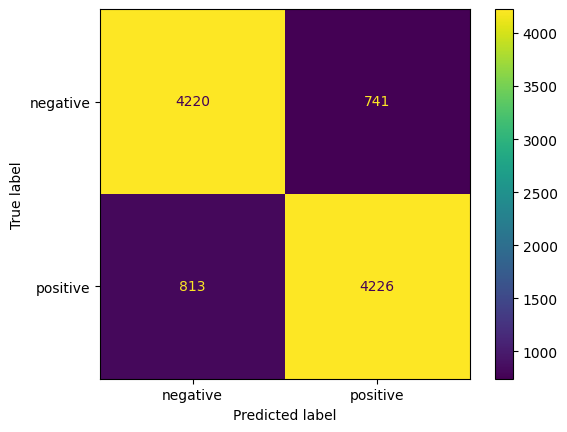

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()


In [18]:
import joblib

# Save model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']